In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.1802   | 0.3474    | 8.822     | 3.573     |
| 9         | -0.09937  | 1.471     | 7.582     | 0.3868    |
| 59        | -0.08459  | 0.9286    | 5.063     | 0.4166    |
| 75        | -0.08033  | 0.5736    | 2.052     | 0.3505    |
| 78        | -0.0614   | 0.1547    | 2.066     | 0.3922    |
| 84        | -0.05057  | 0.6181    | 4.864     | 0.4341    |
| 89        | -0.0364   | 0.4057    | 4.615     | 0.4253    |
Curve params found
{'push': 0.40568401720963193,
 'shift': 4.615496224043848,
 'slope': 0.42530492142716414}
-
## Chance of nonscaling delay ##


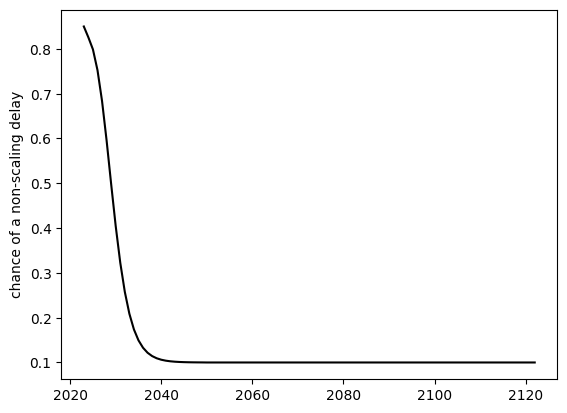

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 85%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 83%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 75%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 60%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 50%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 32%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2033

In [2]:
nonscaling_points = [(2023, 0.85),
                     (2027, 0.7),
                     (2030, 0.3),
                     (2035, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 3         | -0.396    | 6.988     | 8.008     | 5.847     |
| 4         | -0.3206   | 1.625     | 4.433     | 7.581     |
| 5         | -0.2505   | 0.3452    | 7.138     | 5.562     |
| 6         | -0.2272   | 1.386     | 8.164     | 0.6787    |
| 30        | -0.1639   | 1.193     | 2.951     | 0.2517    |
| 34        | -0.1243   | 0.03884   | 1.344     | 0.9209    |
| 55        | -0.06683  | 0.01      | 4.571     | 0.893     |
| 80        | -0.04722  | 0.1421    | 9.593     | 0.6439    |
Curve params found
{'push': 0.14211819073772716,
 'shift': 9.593393167416359,
 'slope': 0.6438940940904343}
-
## Chance of nonscaling delay ##


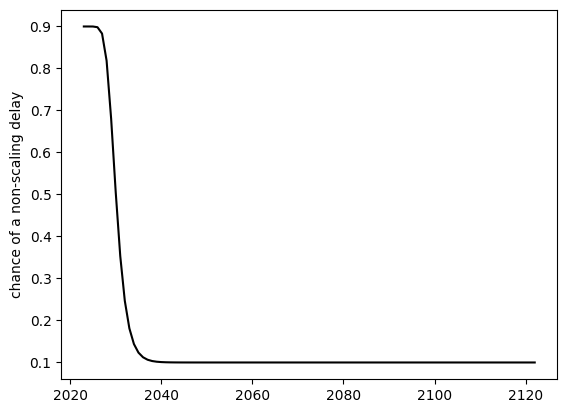

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 88%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 82%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 68%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 51%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 25%
Year: 2033

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2023, 0.9),
                     (2027, 0.7),
                     (2030, 0.5),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 30)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

In [ ]:
nonscaling_points = {'points': [(2025, 0.9),
                                (2027, 0.8),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3998   | 8.201     | 5.029     | 3.255     |
| 10        | -0.3848   | 9.549     | 2.321     | 0.6084    |
| 12        | -0.109    | 0.2688    | 1.742     | 0.3124    |
| 41        | -0.1014   | 0.2331    | 1.439     | 0.3772    |
| 43        | -0.07399  | 0.115     | 1.497     | 0.4232    |
| 47        | -0.0639   | 0.07641   | 2.092     | 0.5679    |
| 65        | -0.008879 | 0.01      | 1.396     | 1.035     |


## Robotics need delay

In [ ]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

In [ ]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

In [ ]:
nonscaling_points = [(2023, 0.4),
                     (2030, 0.3),
                     (2050, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

In [ ]:
nonscaling_points = [(2023, 0.6),
                     (2030, 0.4),
                     (2050, 0.2),
                     (2080, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))

## Take off speeds

In [ ]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff

delays['take_off'] = {'prob': 1, 'length': sq.lognorm(1, 15)}
plot_nonscaling_delay(plt, years, lambda _: 1)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [ ]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')